In [16]:
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 6.9 MB/s eta 0:00:02
   - -------------------------------------- 0.5/10.6 MB 5.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/10.6 MB 5.6 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/10.6 MB 5.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/10.6 MB 5.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.6 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/10.6 MB 5.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.6 MB 5.4 MB/s eta 0:00:02
   -------- ---------

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

C:\Users\samar\AppData\Local\Temp\ipykernel_32596\4257166457.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['top_topic_name'], rotation=45, ha='right')


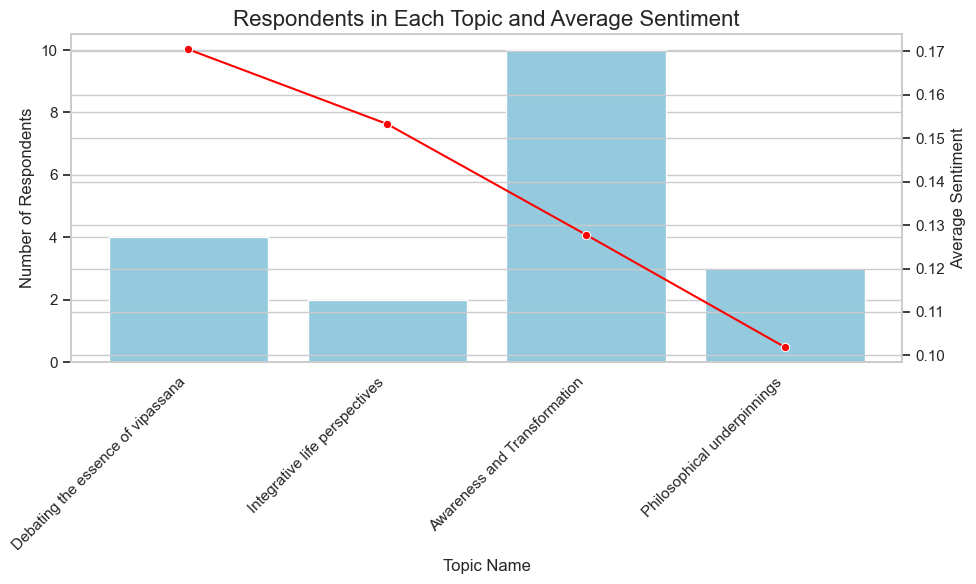

In [9]:
df = pd.read_csv('querydata1.csv')
df.head()
# Setting up the plot
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the bar chart
sns.barplot(x="top_topic_name", y="RespondentsInEachTopic", data=df, color='skyblue', ax=ax1)

# Creating a second y-axis for the average sentiment
ax2 = ax1.twinx()

# Plotting the line chart
sns.lineplot(x="top_topic_name", y="AvgSentiment", data=df, sort=False, marker='o', color='red', ax=ax2)

# Setting the plot title and labels
ax1.set_title('Respondents in Each Topic and Average Sentiment', fontsize=16)
ax1.set_xlabel('Topic Name', fontsize=12)
ax1.set_ylabel('Number of Respondents', fontsize=12)
ax2.set_ylabel('Average Sentiment', fontsize=12)

# Rotating x-axis labels for better readability
ax1.set_xticklabels(df['top_topic_name'], rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.savefig('topic_sentiment.png')
plt.show()


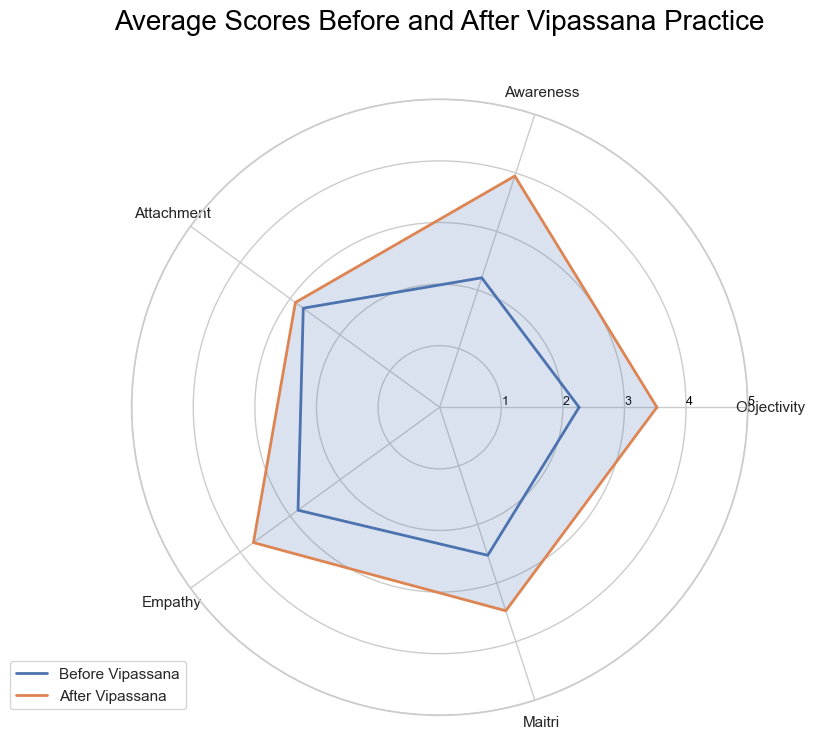

In [13]:
# Creating a DataFrame from the provided data
data = {
    "Attribute": ["Objectivity", "Awareness", "Attachment", "Empathy", "Maitri"],
    "Before Vipassana": [2.2632, 2.2105, 2.7368, 2.8421, 2.5263],
    "After Vipassana": [3.5263, 3.9474, 2.8947, 3.7368, 3.4737]
}

df = pd.DataFrame(data)

# Function to create a radar chart
def create_radar_chart(df, title):
    # Number of variables
    categories = list(df["Attribute"])
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5], ["1","2","3","4","5"], color="black", size=9)
    plt.ylim(0,5)

    # Plot each line
    for column in df.columns[1:]:
        values = df[column].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=column)

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.2)

    # Add a title and a legend
    plt.title(title, size=20, color="black", y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Show the plot
    plt.show()

# Create the radar chart
create_radar_chart(df, "Average Scores Before and After Vipassana Practice")

   ptag_ner  org  date  person  cardinal  gpe  ordinal
0     alind   14    10       9         4    2        1
1  anuradha   14    14       7        13    1        6
2     jyoti   14     2       7         1    1        2
3   saideep   28     3       7         2    2        1
4   sandhya   15     4       6         1    0        1
ptag_ner    object
org          int64
date         int64
person       int64
cardinal     int64
gpe          int64
ordinal      int64
dtype: object


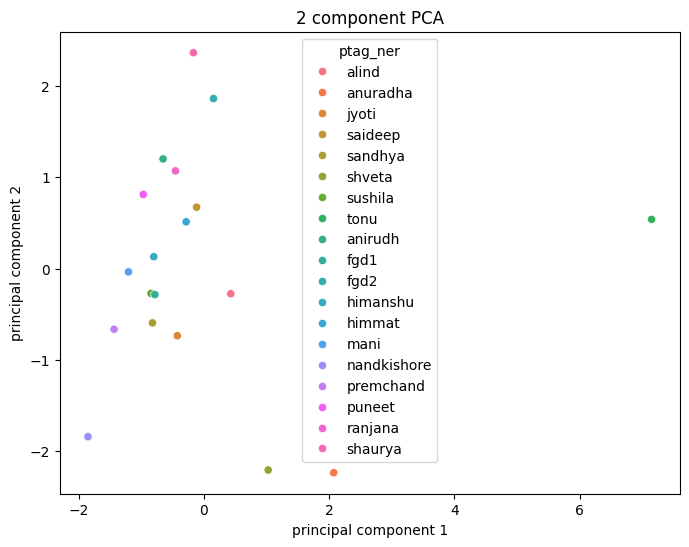

In [19]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df_ner = pd.read_csv('ner_freq.csv')
print(df_ner.head())
print(df_ner.dtypes)

# Separating out the features
features = ['org', 'date', 'person', 'cardinal', 'gpe', 'ordinal']
x = df_ner.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Applying PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Adding ptag_ner for labeling points
principalDf['ptag_ner'] = df_ner['ptag_ner']

# Plotting the results
plt.figure(figsize=(8,6))
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='ptag_ner')
plt.title('2 component PCA')
plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_40340\2017164041.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ner_melted, x='Named Entities', y='Frequency', palette='deep')


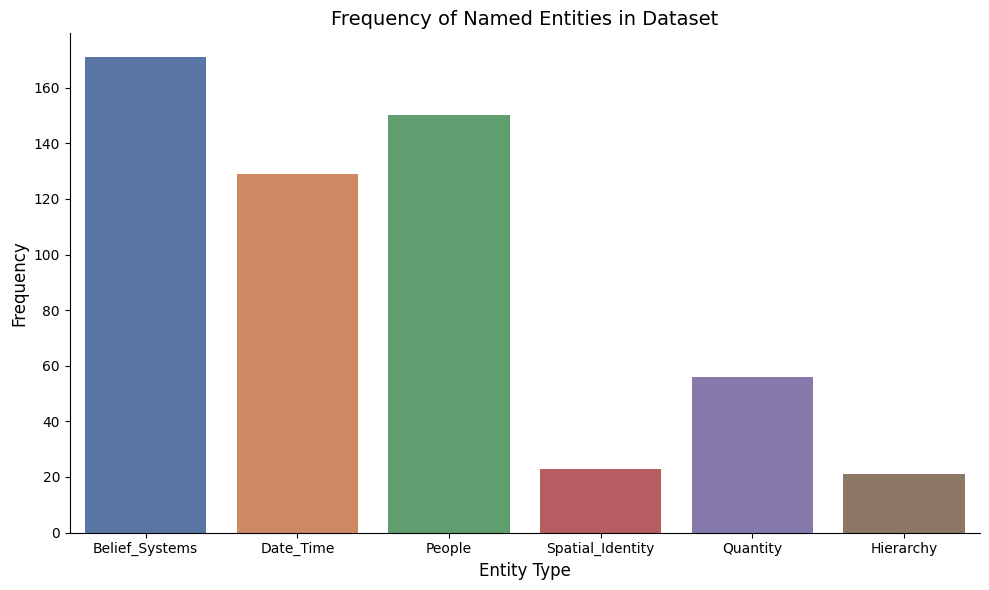

In [19]:
#For Named Entity recognition comparison
# Load the dataset
ner_df = pd.read_csv('ner.csv')

# Create the bar plot
# Since your CSV only has one row of data, melt the dataframe to work with seaborn
ner_melted = ner_df.melt(var_name='Named Entities', value_name='Frequency')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=ner_melted, x='Named Entities', y='Frequency', palette='deep')

# Add labels and title
plt.xlabel('Entity Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of Named Entities in Dataset', fontsize=14)

# Improve layout and aesthetics
sns.despine()  # Remove the top and right spines
plt.tight_layout()

# Save the plot and show it
#plt.savefig('ner_frequency_plot.png')
plt.show()

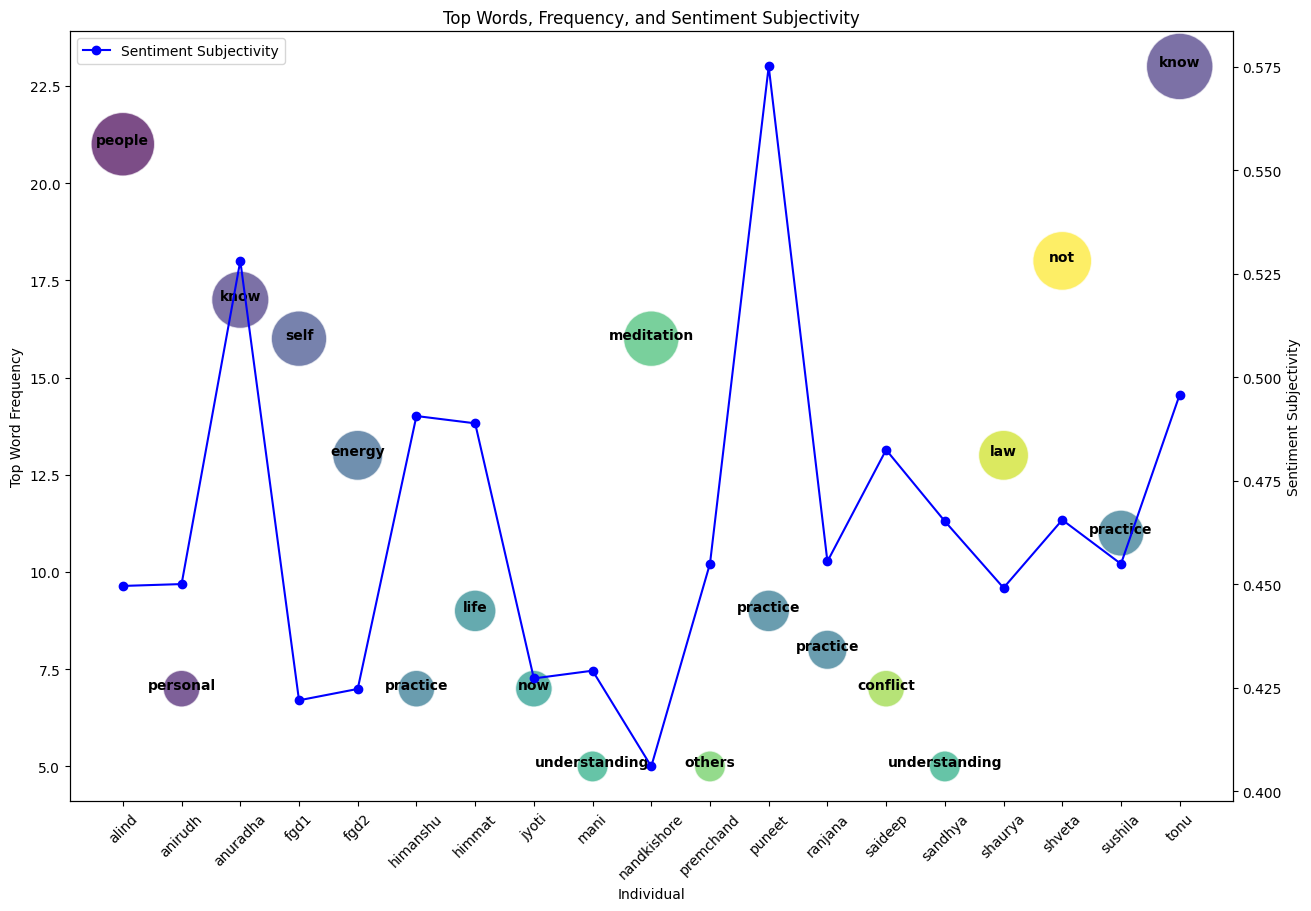

In [9]:
df_word = pd.read_csv('top_word.csv')
df_word.head(19)
# Create a figure with two subplots
# Prepare the figure
plt.figure(figsize=(15, 10))

# Mapping each top word to a number for color coding
unique_words = df_word['top_word'].unique()
colors = np.linspace(0, 1, len(unique_words))
word_to_color = dict(zip(unique_words, colors))

df_word['color'] = df_word['top_word'].map(word_to_color)

# Increase the bubble sizes
bubble_size_factor = 100
font_size = 10

# Bubble Chart
scatter = plt.scatter(df_word['ptag_transcript'], df_word['top_word_freq'], s=df_word['top_word_freq']*bubble_size_factor, c=df_word['color'], cmap='viridis', alpha=0.7, edgecolors='w', label='Top Word Frequency')
plt.title('Top Words, Frequency, and Sentiment Subjectivity')
plt.ylabel('Top Word Frequency')
plt.xlabel('Individual')
plt.xticks(rotation=45)

# Annotating each bubble with its top word
for i, row in df_word.iterrows():
    plt.text(row['ptag_transcript'], row['top_word_freq'], row['top_word'], horizontalalignment='center', size=font_size, color='black', weight='semibold')

# Line Chart for Sentiment Subjectivity
plt.twinx()
plt.plot(df_word['ptag_transcript'], df_word['sentiment_subjectivity'], marker='o', color='blue', label='Sentiment Subjectivity')
plt.ylabel('Sentiment Subjectivity')

# Legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

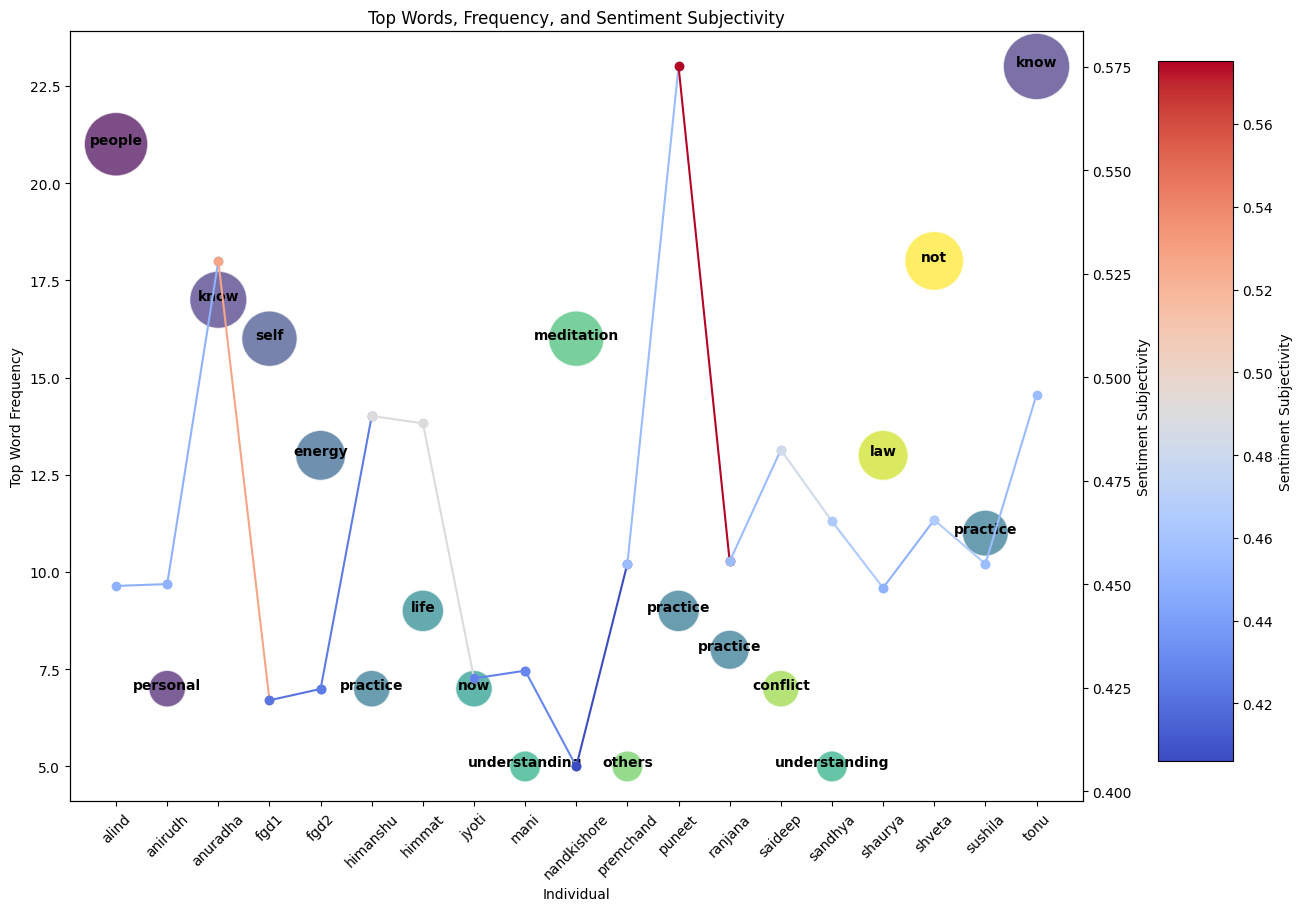

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your data
df_word = pd.read_csv('top_word.csv')

# Prepare the figure
fig, ax1 = plt.subplots(figsize=(15, 10))

# Mapping each top word to a number for color coding
unique_words = df_word['top_word'].unique()
colors = np.linspace(0, 1, len(unique_words))
word_to_color = dict(zip(unique_words, colors))

df_word['color'] = df_word['top_word'].map(word_to_color)

# Increase the bubble sizes and font sizes
bubble_size_factor = 100
font_size = 10

# Bubble Chart
scatter = ax1.scatter(df_word['ptag_transcript'], df_word['top_word_freq'], s=df_word['top_word_freq']*bubble_size_factor, c=df_word['color'], cmap='viridis', alpha=0.7, edgecolors='w')
ax1.set_title('Top Words, Frequency, and Sentiment Subjectivity')
ax1.set_ylabel('Top Word Frequency')
ax1.set_xlabel('Individual')
ax1.tick_params(axis='x', rotation=45)

# Annotating each bubble with its top word
for i, row in df_word.iterrows():
    ax1.text(row['ptag_transcript'], row['top_word_freq'], row['top_word'], horizontalalignment='center', size=font_size, color='black', weight='semibold')

# Sentiment Subjectivity with Gradient
# Normalize sentiment subjectivity for the color mapping
norm = plt.Normalize(df_word['sentiment_subjectivity'].min(), df_word['sentiment_subjectivity'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])

# Plotting the sentiment subjectivity with gradient colors
ax2 = ax1.twinx()
for i in range(len(df_word)-1):
    ax2.plot(df_word['ptag_transcript'][i:i+2], df_word['sentiment_subjectivity'][i:i+2], marker='o', linestyle='-', color=sm.to_rgba(df_word['sentiment_subjectivity'][i]))
ax2.set_ylabel('Sentiment Subjectivity')

# Adjusting the layout for colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])  # Positioning of the colorbar
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Sentiment Subjectivity')

# Show the plot
plt.show()



ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

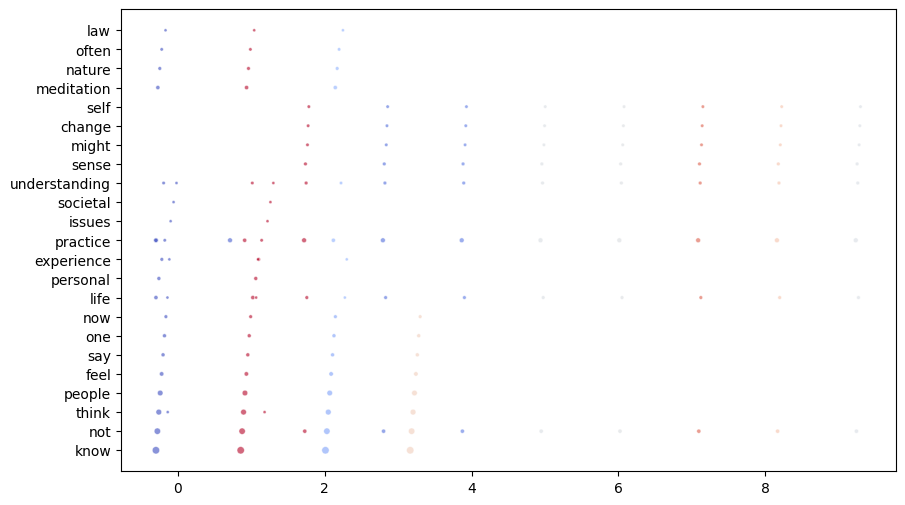

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = pd.read_csv('mixed_data.csv')
# Unique topic names for x-axis labels
# Generate a color palette for sentiment subjectivity
palette = sns.color_palette("coolwarm", as_cmap=True)

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plotting each topic
for topic in data['topic_name'].unique():
    topic_data = data[data['topic_name'] == topic]
    plt.scatter(
        x=np.linspace(-0.3, 0.3, len(topic_data)) + pd.factorize(topic_data['ptag_wwpairs'])[0],  # Spread x position within each group
        y=topic_data['word'],
        s=topic_data['weight']*1000,  # Bubble size
        c=topic_data['sentiment_subjectivity'],  # Bubble color based on sentiment
        cmap=palette,
        alpha=0.6,
        edgecolor='w',
        linewidth=0.5,
        label=topic
    )

# Adding color bar for sentiment subjectivity
sm = plt.cm.ScalarMappable(cmap=palette, norm=plt.Normalize(vmin=data['sentiment_subjectivity'].min(), vmax=data['sentiment_subjectivity'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Sentiment Subjectivity')

# Adjusting y-axis to fit the words
plt.yticks(range(len(data['word'].unique())), data['word'].unique())

# Set the chart title and labels
plt.title('Word Weights and Sentiment Subjectivity by LDA Topic')
plt.xlabel('Participant')
plt.ylabel('Word')

# Add a legend
plt.legend(title='LDA Topics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()


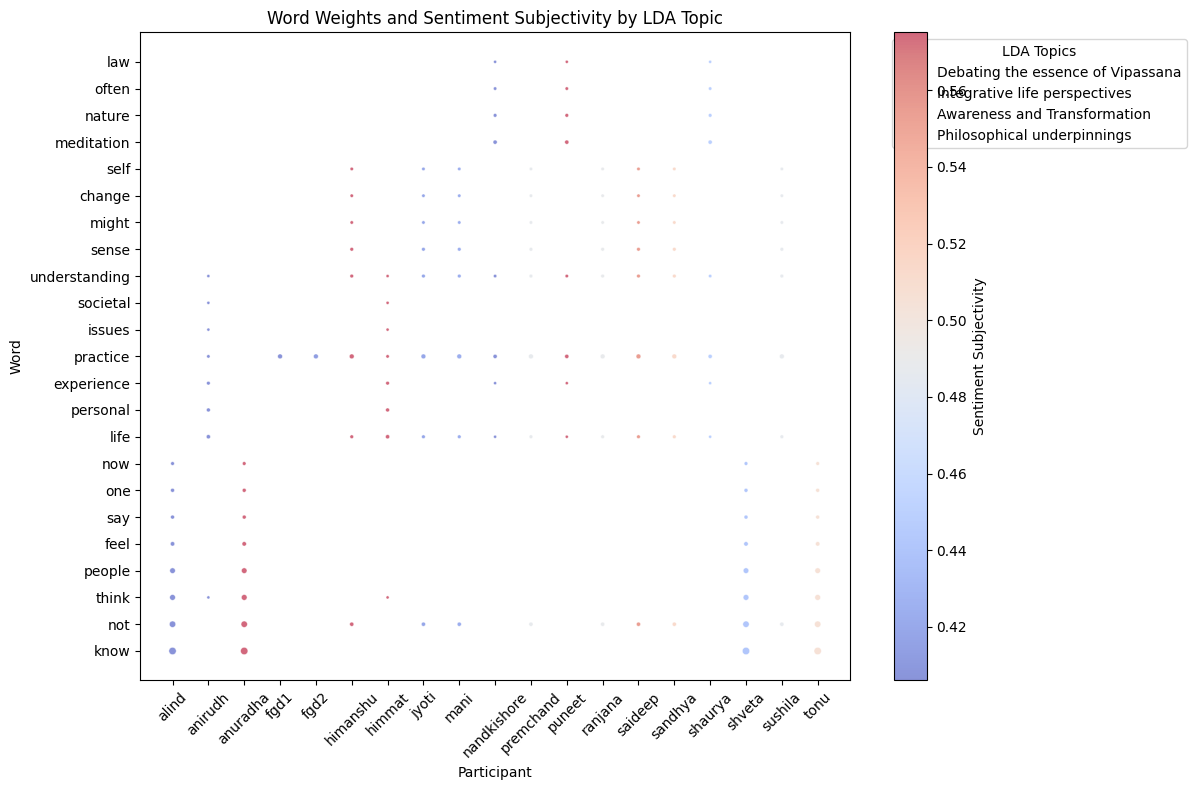

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming data is loaded into a DataFrame named 'data'
data = pd.read_csv('mixed_data.csv')
# Generate a color palette for sentiment subjectivity
palette = sns.color_palette("coolwarm", as_cmap=True)

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Define a dictionary to map ptag to x-axis position
ptag_positions = {ptag: i for i, ptag in enumerate(data['ptag_wwpairs'].unique())}

# Plotting each topic
scatter_plots = []  # To keep track of scatter plot objects for color bar
for topic in data['topic_name'].unique():
    topic_data = data[data['topic_name'] == topic]
    x_positions = topic_data['ptag_wwpairs'].map(ptag_positions)  # Get x positions from the mapping
    scatter = plt.scatter(
        x=x_positions,  # Use mapped x positions
        y=topic_data['word'],
        s=topic_data['weight']*1000,  # Bubble size
        c=topic_data['sentiment_subjectivity'],  # Bubble color based on sentiment
        cmap=palette,
        alpha=0.6,
        edgecolor='w',
        linewidth=0.5,
        label=topic
    )
    scatter_plots.append(scatter)

# Adding color bar for sentiment subjectivity using the last scatter plot object
cbar = plt.colorbar(scatter_plots[-1], orientation='vertical')
cbar.set_label('Sentiment Subjectivity')

# Adjusting y-axis to fit the words
plt.yticks(range(len(data['word'].unique())), data['word'].unique())

# Set the chart title and labels
plt.title('Word Weights and Sentiment Subjectivity by LDA Topic')
plt.xlabel('Participant')
plt.ylabel('Word')

# Adjust x-axis to show participant names
plt.xticks(ticks=np.arange(len(ptag_positions)), labels=ptag_positions.keys(), rotation=45)

# Add a legend
plt.legend(title='LDA Topics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()


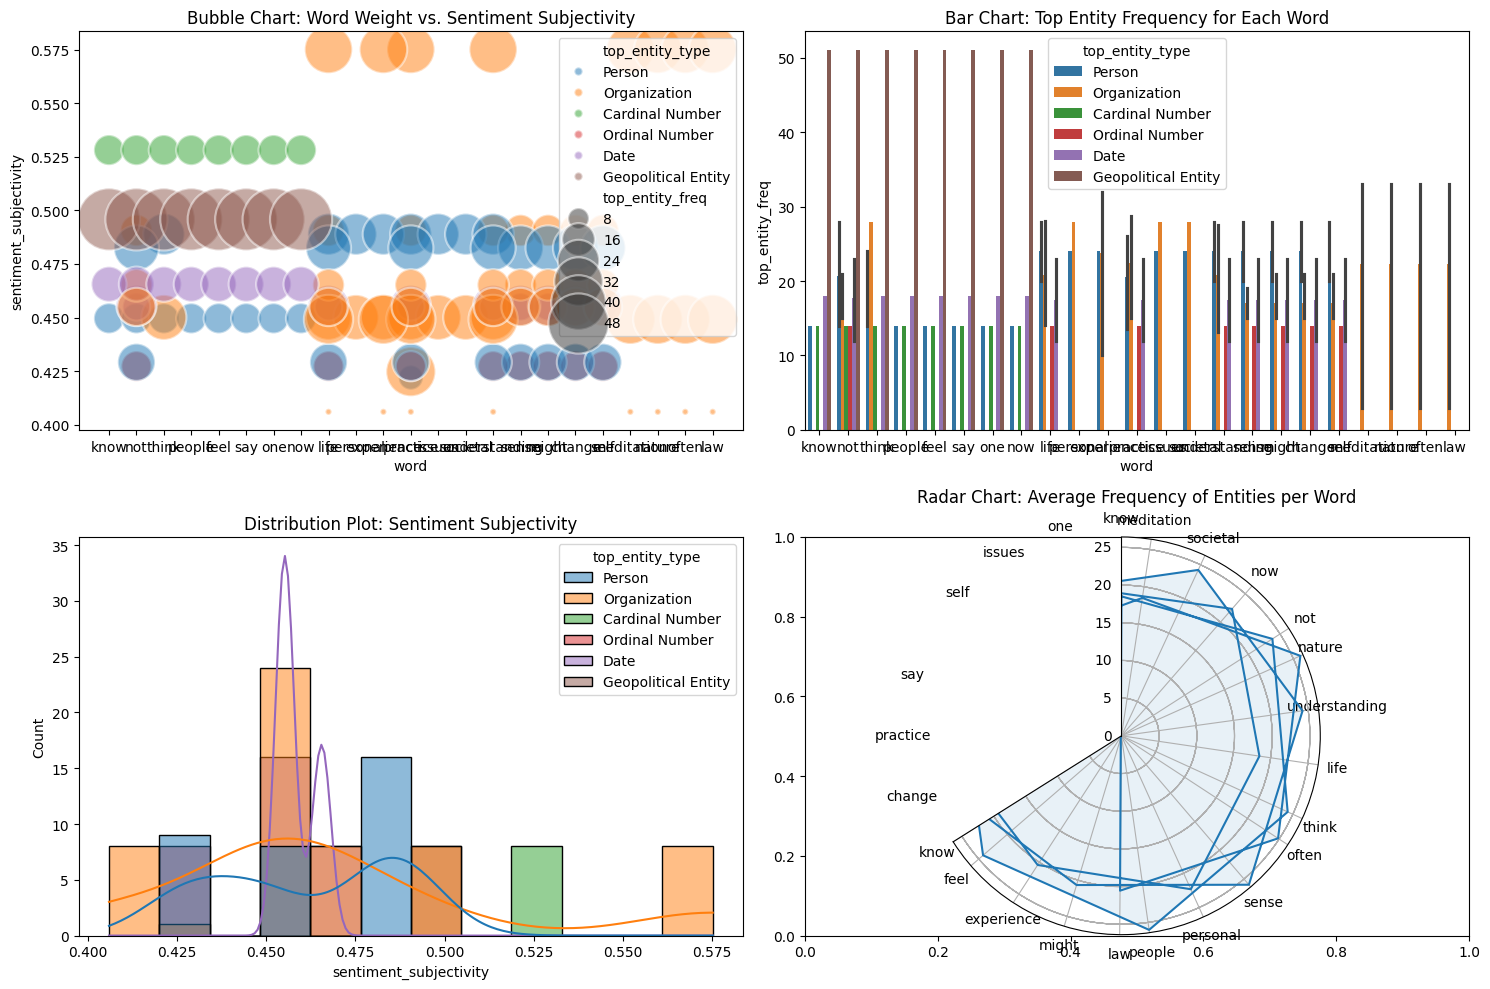

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# Load your data
data = pd.read_csv('mixed_data.csv')

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid of subplots
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Bubble chart: Sentiment Subjectivity vs. Word Weight
sns.scatterplot(ax=axs[0], data=data, x="word", y="sentiment_subjectivity", size="top_entity_freq", hue="top_entity_type", sizes=(20, 2000), alpha=0.5)
axs[0].set_title('Bubble Chart: Word Weight vs. Sentiment Subjectivity')

# Bar chart: Top Entity Frequency for Each Word
sns.barplot(ax=axs[1], data=data, x="word", y="top_entity_freq", hue="top_entity_type")
axs[1].set_title('Bar Chart: Top Entity Frequency for Each Word')

# Distribution plot: Sentiment Subjectivity
sns.histplot(ax=axs[2], data=data, x="sentiment_subjectivity", kde=True, hue="top_entity_type")
axs[2].set_title('Distribution Plot: Sentiment Subjectivity')

# Radar chart: Average Frequency of Entities per Word
# Compute the mean frequency for each word and replicate the first value at the end to close the radar chart circle
values = data.groupby('word')['top_entity_freq'].mean().tolist()
categories = data['word'].unique().tolist()
values += values[:1]
categories += categories[:1]

# Radar chart setup
axs[3] = plt.subplot(2, 2, 4, polar=True)
axs[3].set_theta_offset(pi / 2)
axs[3].set_theta_direction(-1)
plt.xticks(ticks=np.arange(len(categories)), labels=categories)

# Plot data
axs[3].plot(categories, values)
axs[3].fill(categories, values, alpha=0.1)
axs[3].set_title('Radar Chart: Average Frequency of Entities per Word')

# Show the final plot
plt.tight_layout()
plt.show()


C:\Users\samar\AppData\Local\Temp\ipykernel_2200\3107949099.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


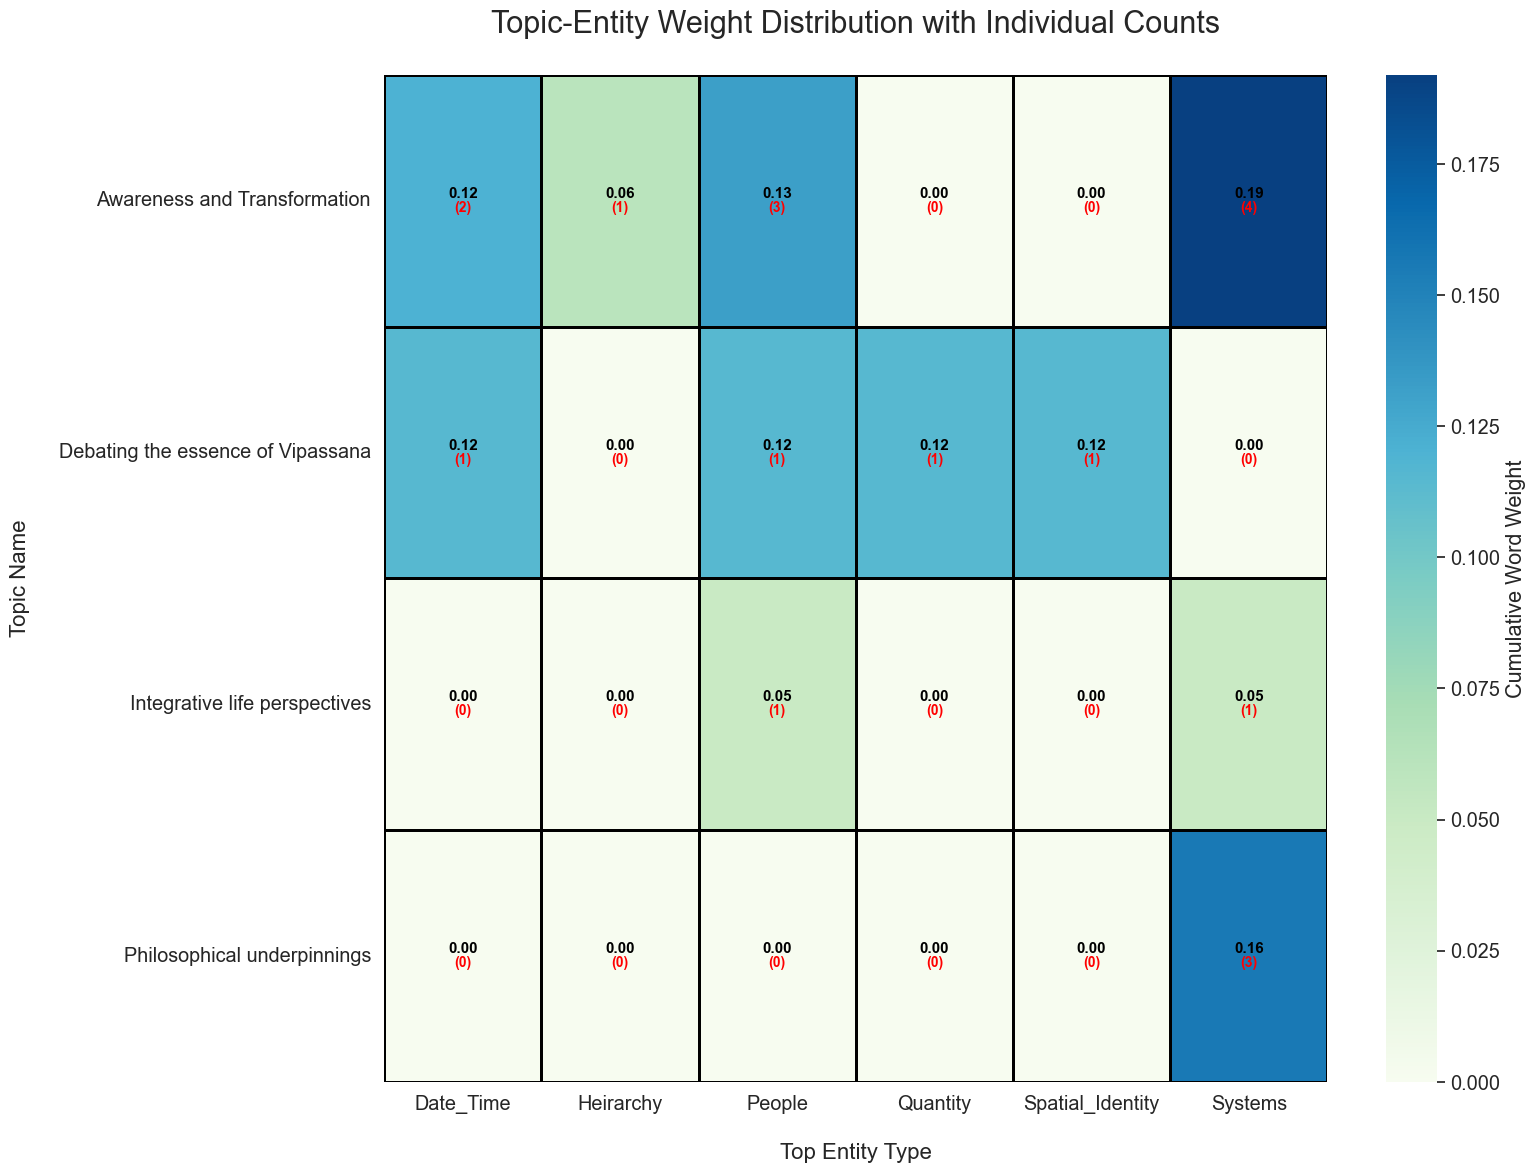

In [1]:
# Re-import necessary libraries and re-define variables after code execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-define dataframe and processed data for visualization
file_path = 'mixed_data.xlsx'
df = pd.read_excel(file_path)

# Aggregate data to calculate the total weight of words for each topic and entity type combination
agg_data = df.groupby(['topic_name', 'top_entity_type'])['weight'].sum().reset_index()

# Pivot the data to create a format suitable for heatmap generation
pivot_data = agg_data.pivot(index="topic_name", columns="top_entity_type", values="weight").fillna(0)


# Calculate the count of unique individuals (ptag_wwpairs) contributing to each topic-entity combination
individual_counts = df.groupby(['topic_name', 'top_entity_type'])['ptag_wwpairs'].nunique().reset_index()

# Merge the individual counts with the aggregated weight data
agg_data_with_counts = pd.merge(agg_data, individual_counts, on=['topic_name', 'top_entity_type'], how='left')

# Pivot the data for individual counts to match the format of the weight pivot
pivot_counts = agg_data_with_counts.pivot(index="topic_name", columns="top_entity_type", values="ptag_wwpairs").fillna(0)

# Re-introducing the individual counts in a non-overlapping manner and attempting to list individual tags if feasible within space constraints.

plt.figure(figsize=(16, 12))
sns.set(font_scale=1.3)
# Generate the heatmap for the cumulative word weights
heatmap = sns.heatmap(pivot_data, cmap="GnBu", linewidths=1, linecolor='black',
                      cbar_kws={'label': 'Cumulative Word Weight'}, annot=False)

# Adding annotations manually for both weight and individual count, with individual tags where possible
for y in range(pivot_data.shape[0]):
    for x in range(pivot_data.shape[1]):
        # Display the weight at the top of the cell
        weight_text = f"{pivot_data.iloc[y, x]:.2f}"
        plt.text(x + 0.5, y + 0.5, weight_text,
                 horizontalalignment='center',
                 verticalalignment='bottom',
                 fontsize=11, weight='bold', color='black')

        # Display the count of individuals in brackets at the bottom of the cell
        count_text = f"({int(pivot_counts.iloc[y, x])})"
        plt.text(x + 0.5, y + 0.5, count_text,
                 horizontalalignment='center',
                 verticalalignment='top',
                 fontsize=10, weight='bold', color='red')

# Since listing individual tags within each cell may lead to clutter due to space constraints,
# we will annotate the counts at the top of the cell to keep the visualization clean and readable.

heatmap.set_title('Topic-Entity Weight Distribution with Individual Counts\n', size=22)
heatmap.set_xlabel('\nTop Entity Type', size=16)
heatmap.set_ylabel('Topic Name\n', size=16)

plt.tight_layout()
plt.show()


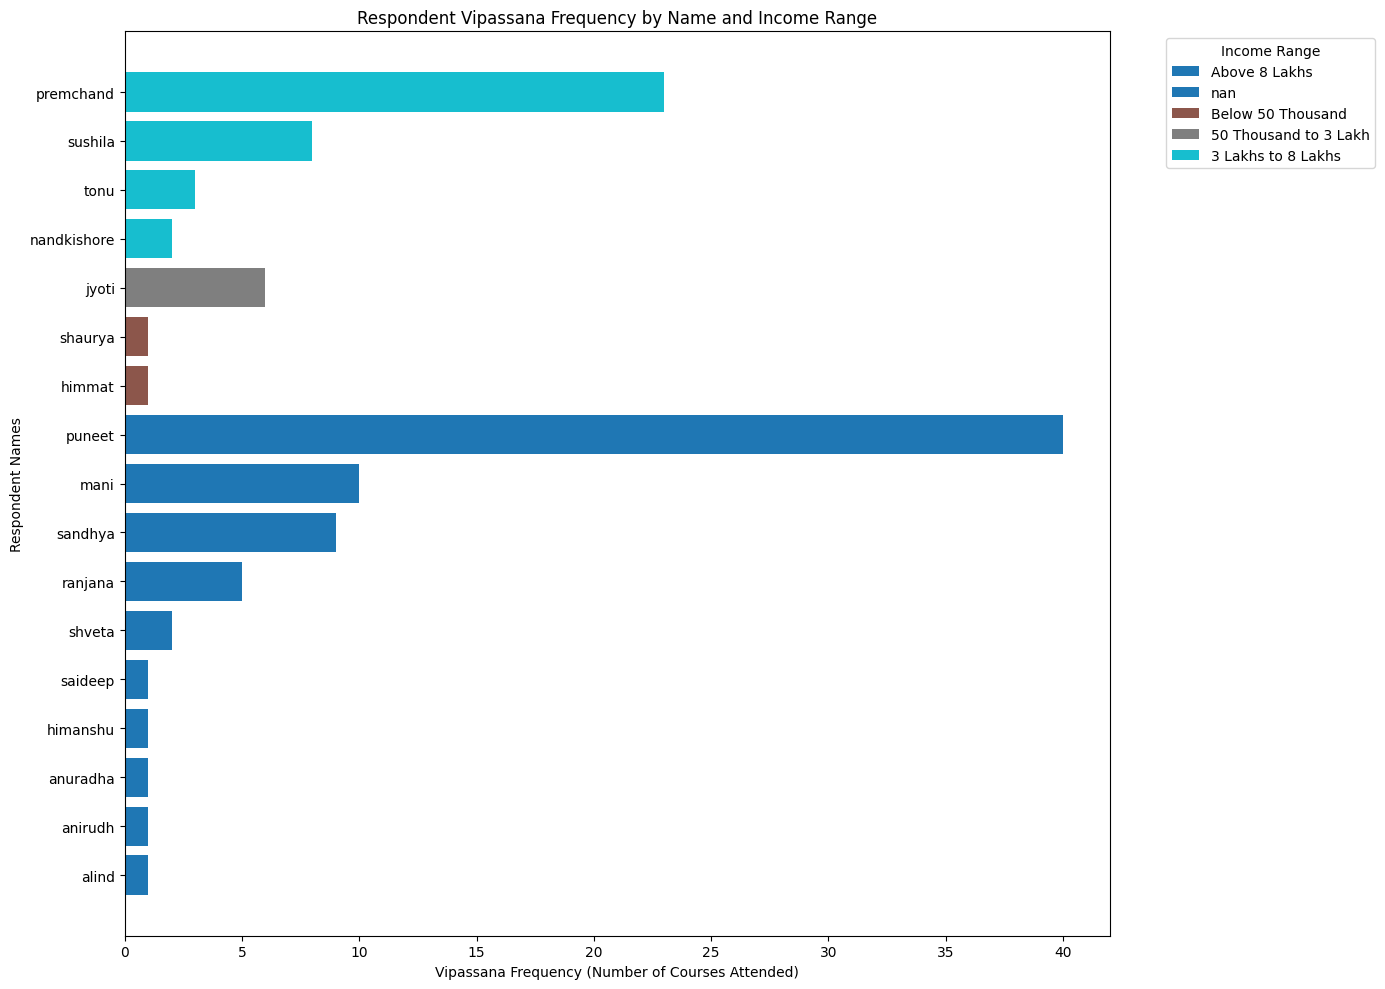

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the file path is correct and the file is in the same directory as the script
df = pd.read_excel('social_location_vipassana.xlsx')

# Mapping 'None' to 'Not Specified' for clarity in the visualization
df['annual_income_range'] = df['annual_income_range'].replace({'None': 'Not Specified', 'Below 50 thousand': 'Below 50 Thousand'})

# Correcting the income categories in the DataFrame for consistency
income_categories_corrected = {
    'Below 50 Thousand': 'Below 50 Thousand',
    '50 thousand to 3 lakh': '50 Thousand to 3 Lakh',
    '3 Lakhs to 8 Lakhs': '3 Lakhs to 8 Lakhs',
    'Above 8 Lakhs': 'Above 8 Lakhs',
    'Not Specified': 'Not Specified'
}
df['income_group'] = df['annual_income_range'].map(income_categories_corrected)

# Ensure 'income_ranges' variable is defined correctly for color mapping
income_ranges = df['income_group'].unique()

# Sorting the DataFrame to ensure consistent coloring and to handle 'df_sorted' reference
df_sorted = df.sort_values(by='vip_freq')

# Re-defining specific colors for each income range using numpy for linspace
colors = plt.cm.tab10(np.linspace(0, 1, len(income_ranges)))
color_dict = {income_range: color for income_range, color in zip(income_ranges, colors)}

# Re-plotting with the correct color assignments
plt.figure(figsize=(14, 10))
for income_range in income_ranges:
    subset = df_sorted[df_sorted['income_group'] == income_range]
    plt.barh(subset['tag'], subset['vip_freq'], color=color_dict[income_range], label=income_range)

plt.xlabel('Vipassana Frequency (Number of Courses Attended)')
plt.ylabel('Respondent Names')
plt.title('Respondent Vipassana Frequency by Name and Income Range')

# Ensure the legend matches the income ranges
plt.legend(title='Income Range', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



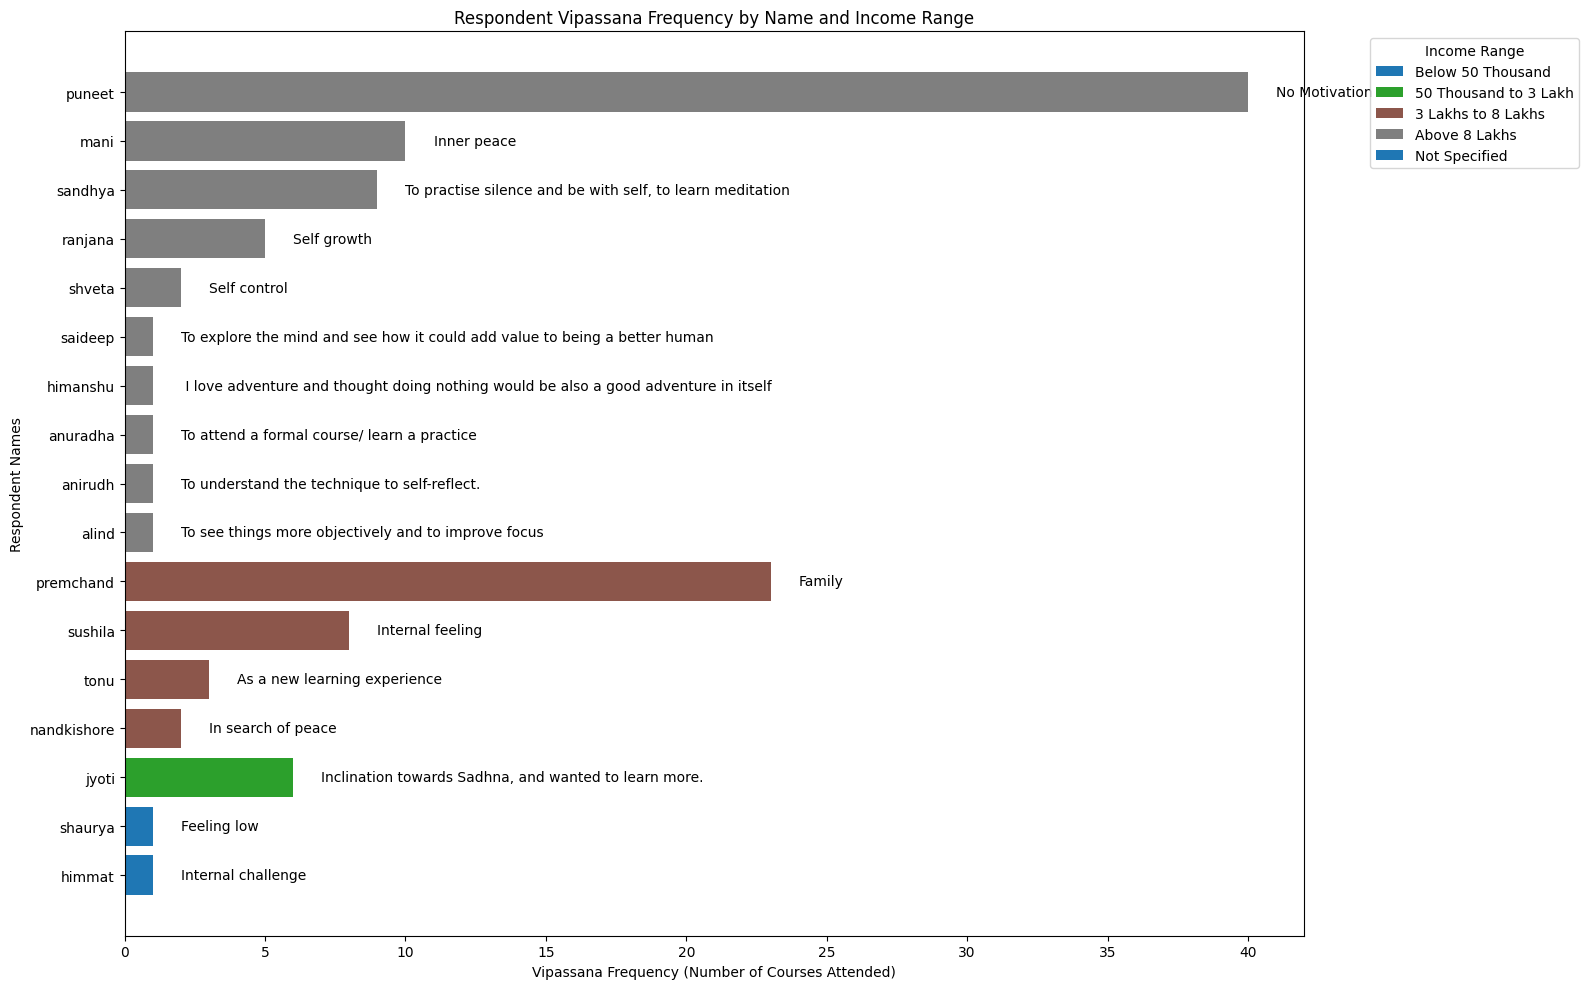

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the file path is correct and the file is in the same directory as the script
df = pd.read_excel('social_location_vipassana.xlsx')

# Mapping 'None' to 'Not Specified' for clarity in the visualization
df['annual_income_range'] = df['annual_income_range'].replace({'None': 'Not Specified', 'Below 50 thousand': 'Below 50 Thousand'})

# Correcting the income categories in the DataFrame for consistency
income_categories_corrected = {
    'Below 50 Thousand': 'Below 50 Thousand',
    '50 thousand to 3 lakh': '50 Thousand to 3 Lakh',
    '3 Lakhs to 8 Lakhs': '3 Lakhs to 8 Lakhs',
    'Above 8 Lakhs': 'Above 8 Lakhs',
    'Not Specified': 'Not Specified'
}
df['income_group'] = df['annual_income_range'].map(income_categories_corrected)

# Sorting the DataFrame to ensure consistent coloring and to handle 'df_sorted' reference
df_sorted = df.sort_values(by='vip_freq')

# Define specific colors for each income range using numpy for linspace
colors = plt.cm.tab10(np.linspace(0, 1, len(income_categories_corrected)))
color_dict = {income_range: color for income_range, color in zip(income_categories_corrected.values(), colors)}

# Re-plotting with the updated text placement and adjusted layout
plt.figure(figsize=(16, 10))  # Increased figure width to give more space for motivations text
for income_range in income_categories_corrected.values():
    subset = df_sorted[df_sorted['income_group'] == income_range]
    bars = plt.barh(subset['tag'], subset['vip_freq'], color=color_dict[income_range], label=income_range)
    
    # Add text annotations all to the right
    for bar, motivation in zip(bars, subset['vipassana_motivation']):
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                 str(motivation), 
                 va='center', ha='left')

plt.xlabel('Vipassana Frequency (Number of Courses Attended)')
plt.ylabel('Respondent Names')
plt.title('Respondent Vipassana Frequency by Name and Income Range')

# Create the legend
plt.legend(title='Income Range', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to remove unnecessary whitespace on the left
plt.subplots_adjust(left=0.15)

# Adjust the plot layout to make room for the legend and ensure nothing is cut off
plt.tight_layout()
plt.show()


In [4]:
%pip install adjustText

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


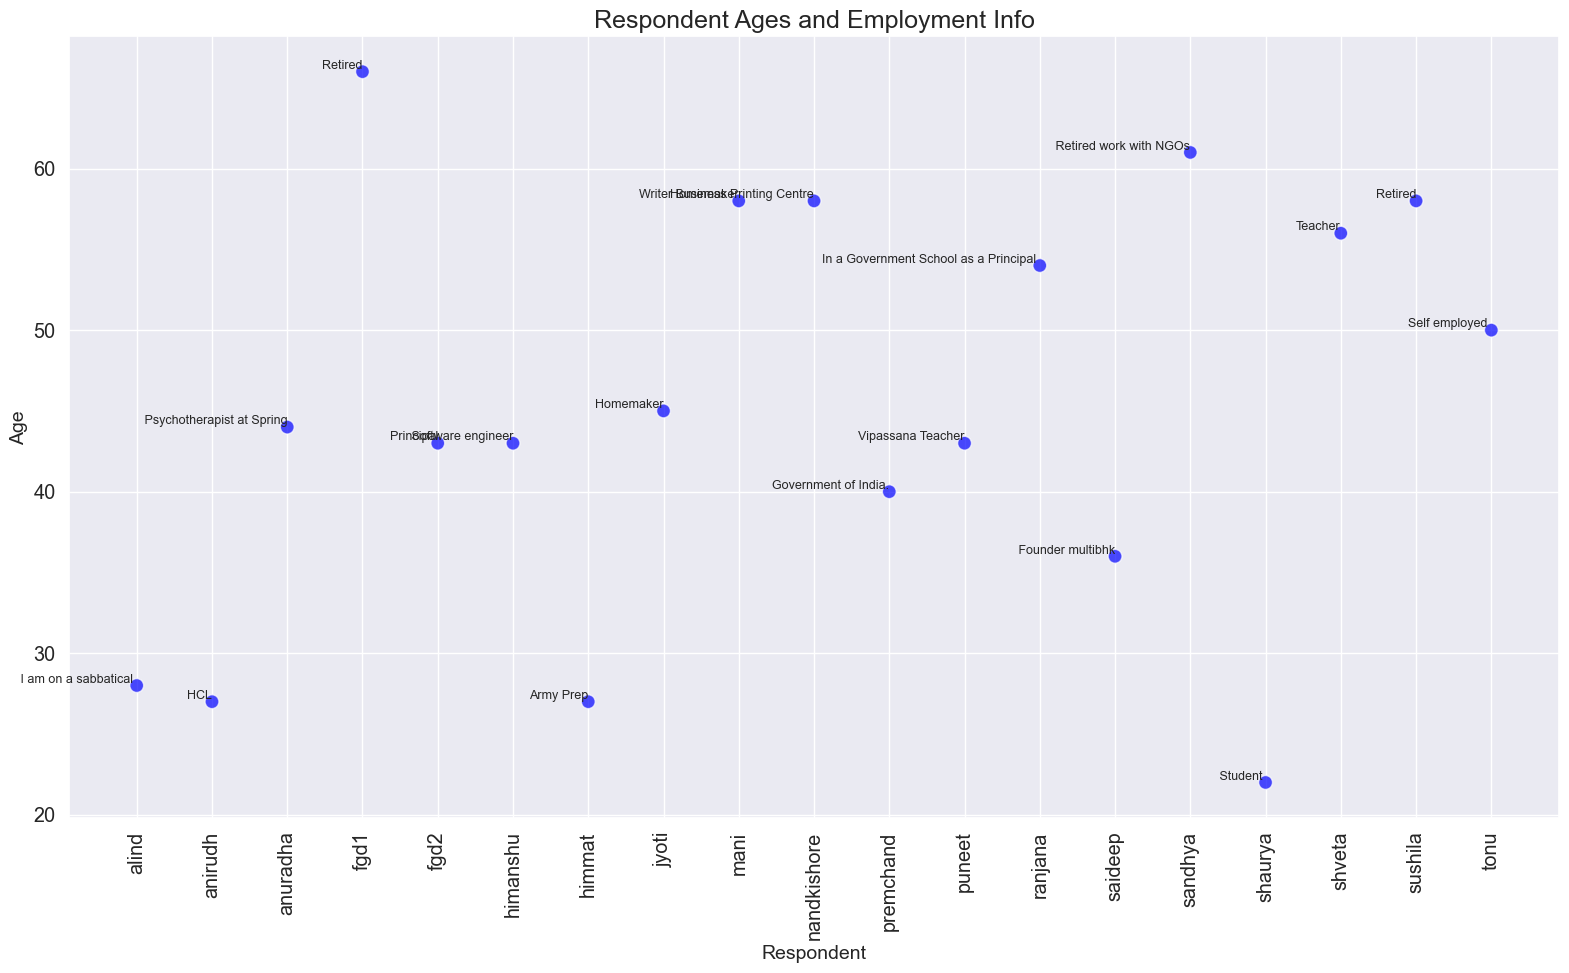

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import adjustText

# Assuming the file path is correct and the file is in the same directory as the script
df = pd.read_excel('social_location_vipassana.xlsx')

# Define a color mapping based on employment status: 'Not employed' -> Red, otherwise -> Blue
color_map = df['employment_info'].apply(lambda x: 'red' if 'not' in str(x).lower() else 'blue')

# Initialize a new plot with improved aesthetics
plt.figure(figsize=(16, 10))
scatter = plt.scatter(
    x=df['tag'],
    y=df['age'],
    alpha=0.7,
    c=color_map,  # Apply our color mapping here
    edgecolor='w',
    s=100
)

# Improve annotations to avoid overlap and increase legibility
for i, txt in enumerate(df['employment_info']):
    plt.text(
        df['tag'][i],  # X position (respondent's tag)
        df['age'][i],  # Y position (respondent's age)
        str(txt),  # The employment info text
        fontsize=9,  # Smaller font size to fit annotations
        ha='right',  # Horizontal alignment to the right, to reduce overlap
        va='bottom',  # Vertical alignment to the bottom, to reduce overlap
    )

# Aesthetics for the plot
plt.title('Respondent Ages and Employment Info', fontsize=18)
plt.xlabel('Respondent', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)  # Add grid for better readability of the plot
plt.tight_layout()  # Adjust layout to fit all elements

# Save the enhanced plot
#enhanced_scatter_fig_path = '/mnt/data/enhanced_respondent_ages_employment_info.png'
#plt.savefig(enhanced_scatter_fig_path)

# Show the plot
plt.show()




c:\Users\samar\OneDrive\Desktop\dissertation_nlp\.venv\Lib\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


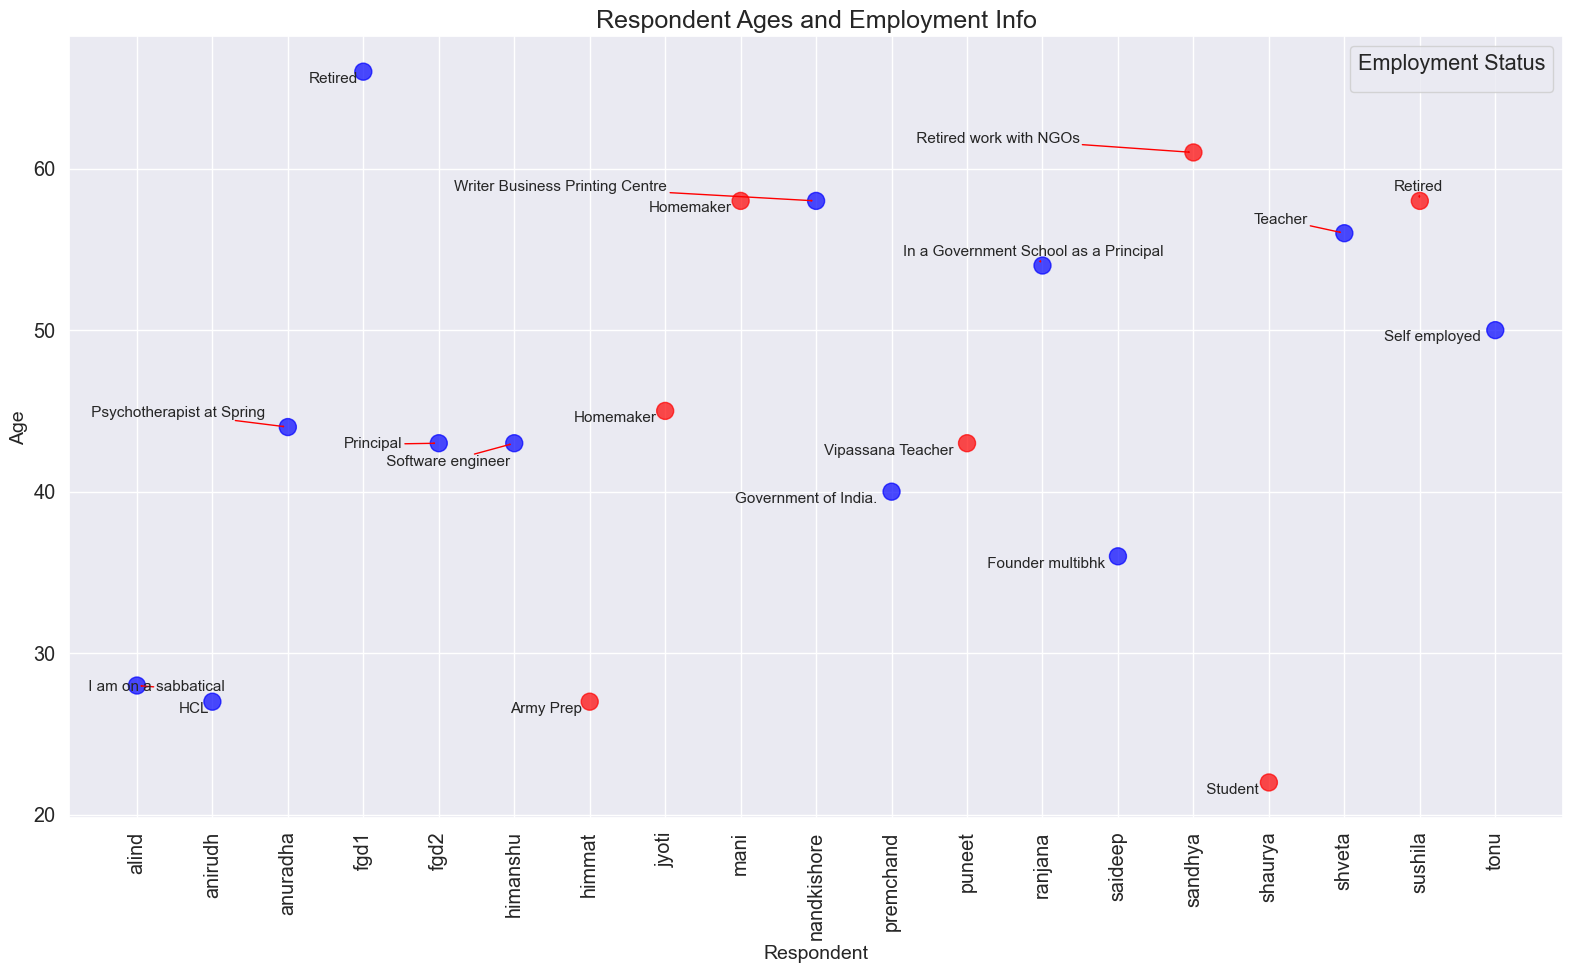

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import adjustText
# Re-import adjustText because the previous execution environment is reset
from adjustText import adjust_text

# Load the corrected Excel file again
df = pd.read_excel('social_location_vipassana.xlsx')

# Define a color mapping based on 'employment_status' column
color_map = df['employment_status'].map({'Yes': 'blue', 'No': 'red'})

# Create the scatter plot
plt.figure(figsize=(16, 10))
scatter = plt.scatter(
    x=df['tag'], 
    y=df['age'], 
    alpha=0.7, 
    c=color_map,  # Color code based on employment status
    s=150  # Increase the size of the dots
)

# Improve annotations to avoid overlap and increase legibility
texts = []
for i, txt in enumerate(df['employment_info']):
    if pd.notna(txt):  # Check if the employment info is not NaN
        texts.append(plt.text(
            df['tag'][i], 
            df['age'][i], 
            str(txt), 
            fontsize=11,  # Slightly larger font size for annotations
            ha='right',  # Horizontal alignment to avoid overlap
            va='bottom'  # Vertical alignment to avoid overlap
        ))

# Use adjust_text from the adjustText package to iteratively adjust the text positions
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Add a legend to the plot to differentiate employment status
plt.legend(handles=scatter.legend_elements()[0], labels=['Employed', 'Not Employed'], title="Employment Status")

# Aesthetics for the plot
plt.title('Respondent Ages and Employment Info', fontsize=18)
plt.xlabel('Respondent', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)  # Add grid for better readability of the plot
plt.tight_layout()  # Adjust layout to fit all elements

# Save the enhanced plot
#enhanced_scatter_fig_path_v3 = '/mnt/data/enhanced_respondent_ages_employment_info_v3.png'
#plt.savefig(enhanced_scatter_fig_path_v3)

# Show the plot
plt.show()

#enhanced_scatter_fig_path_v3



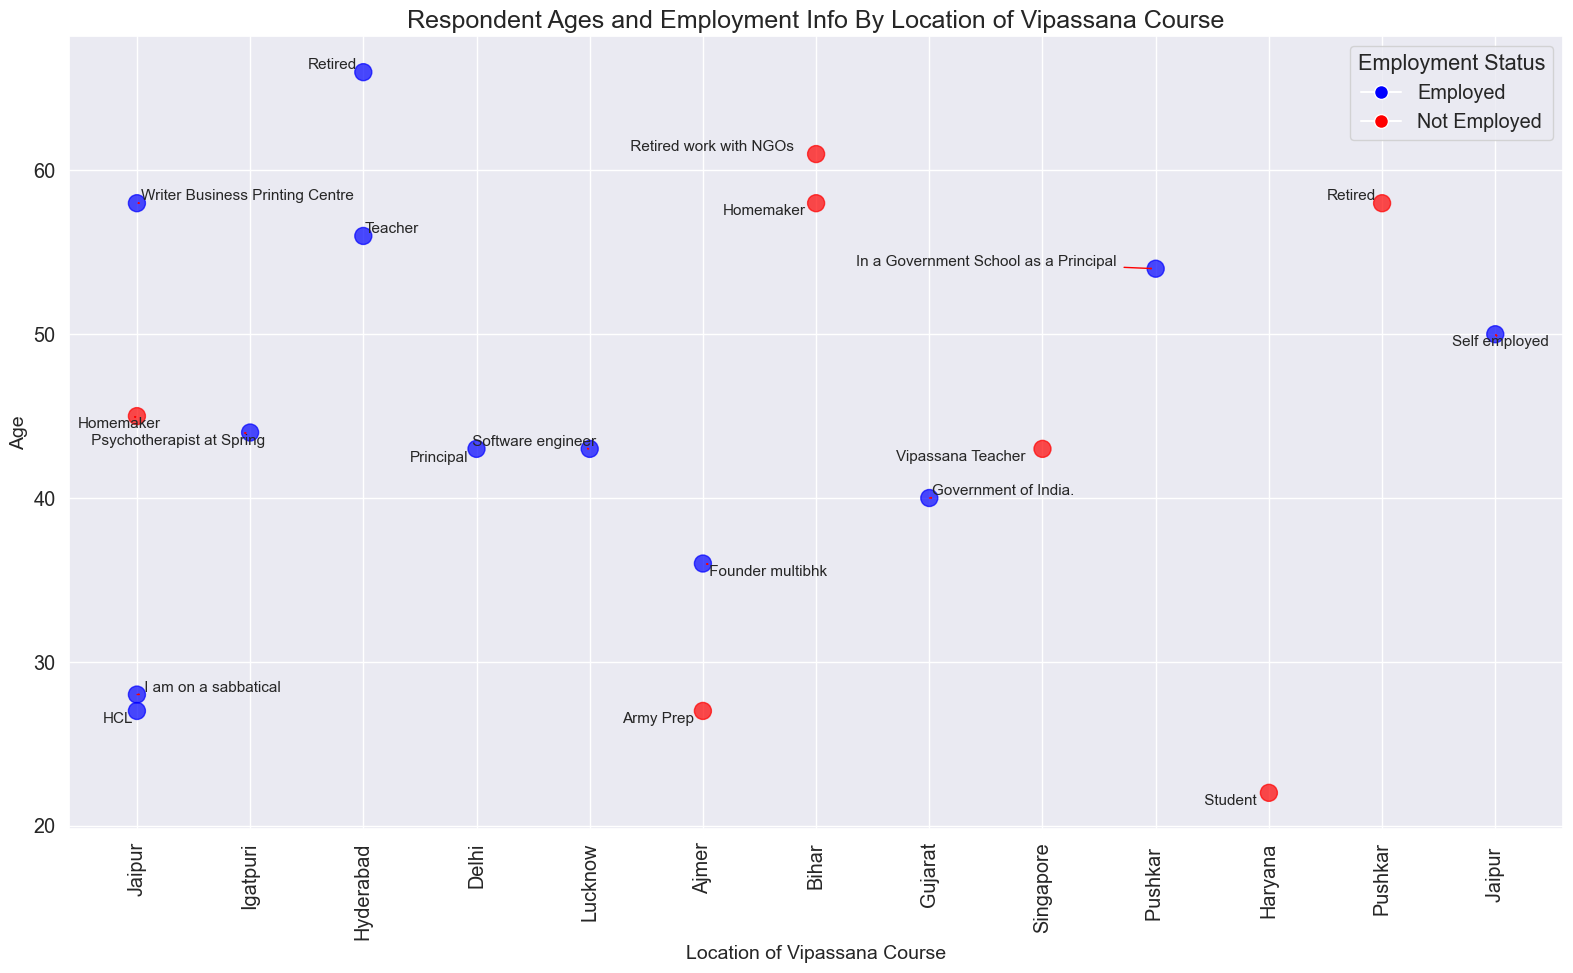

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import adjustText
# Re-import adjustText because the previous execution environment is reset
from adjustText import adjust_text

# Load the corrected Excel file again
df = pd.read_excel('social_location_vipassana.xlsx')

# Define a color mapping based on 'employment_status' column
color_map = df['employment_status'].map({'Yes': 'blue', 'No': 'red'})

# Create the scatter plot
plt.figure(figsize=(16, 10))
scatter = plt.scatter(
    x=df['location_vip_course'], 
    y=df['age'], 
    alpha=0.7, 
    c=color_map,  # Color code based on employment status
    s=150  # Increase the size of the dots
)

# Create a list to store references to the text annotations
texts = []
for i, txt in enumerate(df['employment_info']):
    texts.append(plt.text(df['location_vip_course'][i], df['age'][i], str(txt), fontsize=11, ha='center', va='center'))

# Adjust the positions of the text annotations
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Create custom handles for the legend
from matplotlib.lines import Line2D
legend_handles = [Line2D([0], [0], marker='o', color='w', label='Employed',
                          markerfacecolor='blue', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Not Employed',
                          markerfacecolor='red', markersize=10)]

# Add a legend to the plot
plt.legend(handles=legend_handles, title="Employment Status")

# Aesthetics for the plot
plt.title('Respondent Ages and Employment Info By Location of Vipassana Course', fontsize=18)
plt.xlabel('Location of Vipassana Course', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# Save the enhanced plot
#enhanced_scatter_fig_path_v3 = '/mnt/data/enhanced_respondent_ages_employment_info_v3.png'
#plt.savefig(enhanced_scatter_fig_path_v3)

# Show the plot
plt.show()

#enhanced_scatter_fig_path_v3
